In the paper that I chose (https://doi.org/10.1038/s41593-023-01542-x), mice perform a binary behavioral task where they must choose between left/right and then up/down to get a reward. The authors use logistic regression, which assumes a binomial distribution, to investigate how previous rewards influence the choice that the mouse will make next.

Optimization terminated successfully.
         Current function value: 0.651918
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                 choice   No. Observations:                  199
Model:                          Logit   Df Residuals:                      197
Method:                           MLE   Df Model:                            1
Date:                Fri, 05 Sep 2025   Pseudo R-squ.:                 0.04036
Time:                        10:55:39   Log-Likelihood:                -129.73
converged:                       True   LL-Null:                       -135.19
Covariance Type:            nonrobust   LLR p-value:                 0.0009557
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0935      0.194     -0.483      0.629      -0.473       0.286
prev_reward     0.9721    

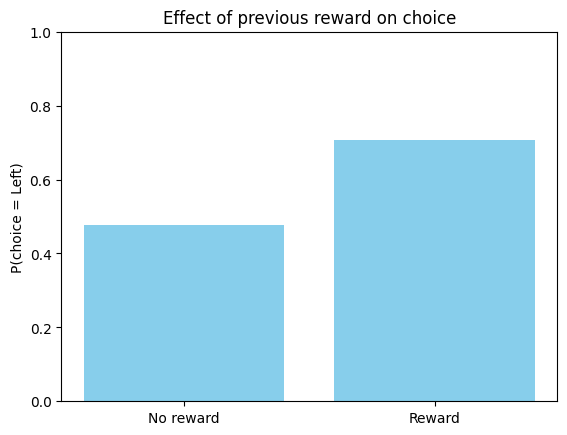

In [3]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# ---------------------------
# 1. Simulate binary choices
# ---------------------------
n_trials = 200
choices = np.zeros(n_trials)
rewards = np.zeros(n_trials)

beta0 = -0.2      # baseline bias
beta_reward = 1.0 # reward effect

for t in range(1, n_trials):
    X = beta0 + beta_reward * rewards[t-1]
    p_left = 1 / (1 + np.exp(-X))      # logistic function
    choices[t] = np.random.binomial(1, p_left)
    rewards[t] = np.random.binomial(1, 0.6 if choices[t] == 1 else 0.4)

# ---------------------------
# 2. Put data in DataFrame
# ---------------------------
data = pd.DataFrame({
    "choice": choices[1:],          # drop first trial
    "prev_reward": rewards[:-1]
})

# ---------------------------
# 3. Fit logistic regression
# ---------------------------
X = sm.add_constant(data["prev_reward"])
y = data["choice"]
model = sm.Logit(y, X).fit()
print(model.summary())

# ---------------------------
# 4. Plot choice probability by prev_reward
# ---------------------------
grouped = data.groupby("prev_reward")["choice"].mean()

plt.bar(grouped.index, grouped.values, color="skyblue")
plt.xticks([0, 1], ["No reward", "Reward"])
plt.ylabel("P(choice = Left)")
plt.title("Effect of previous reward on choice")
plt.ylim(0, 1)
plt.show()
